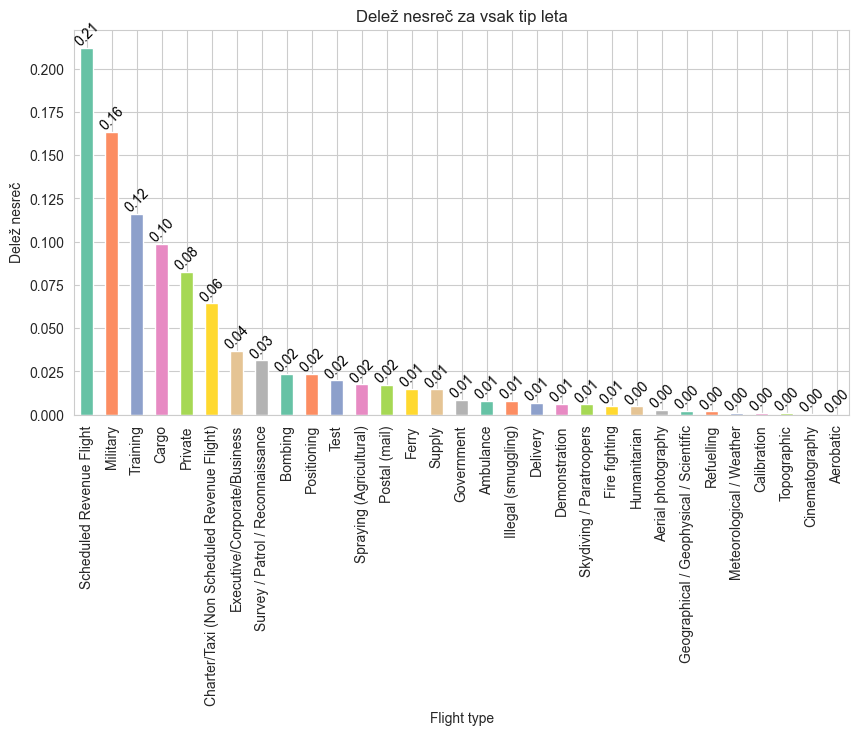

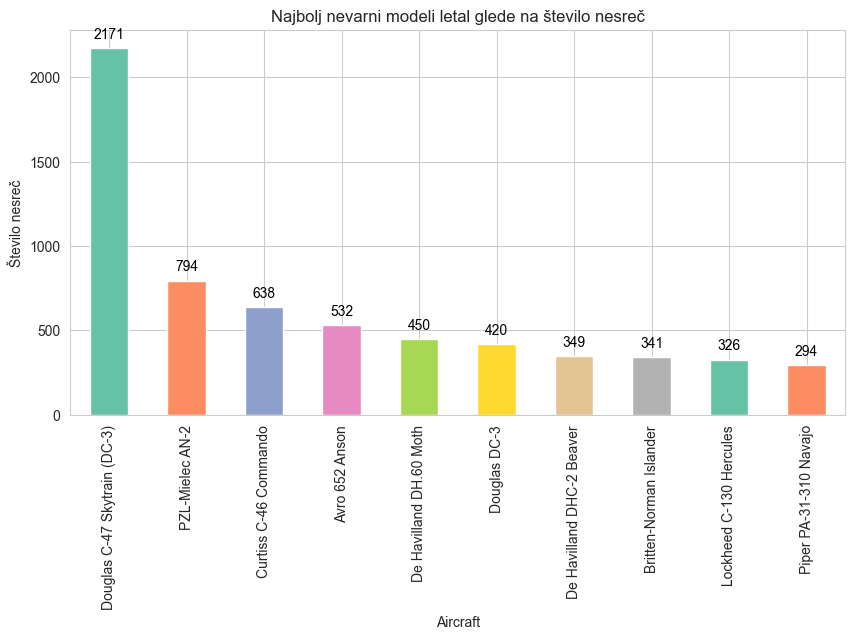

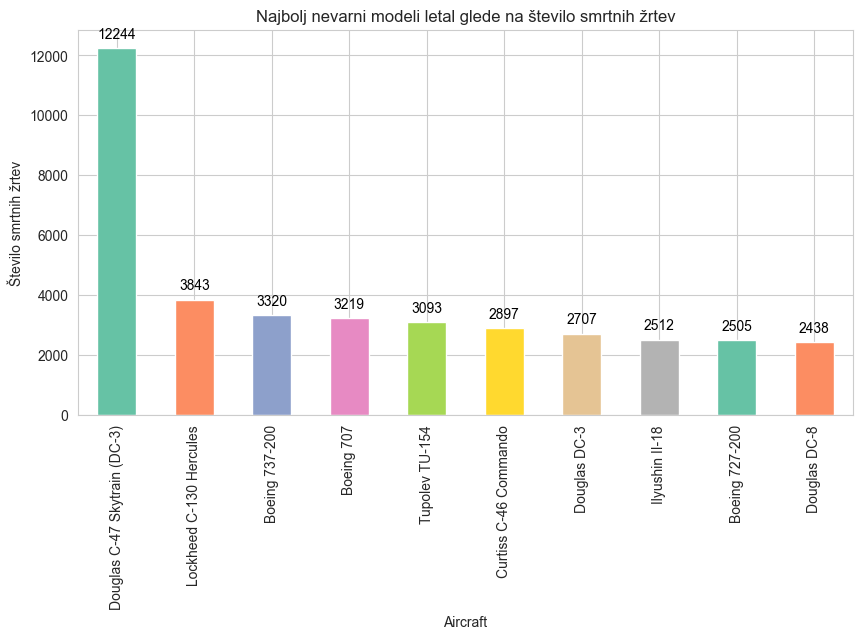

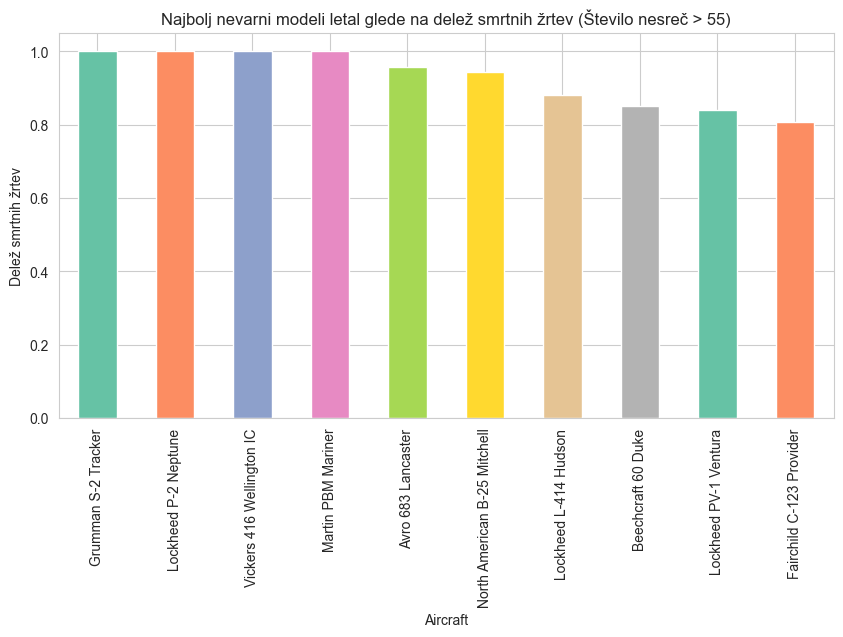

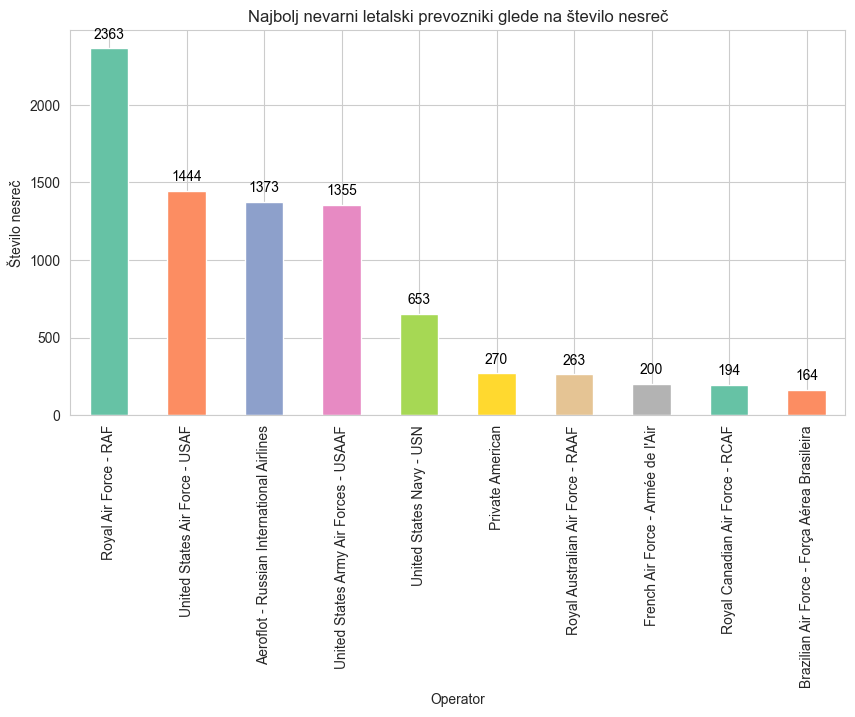

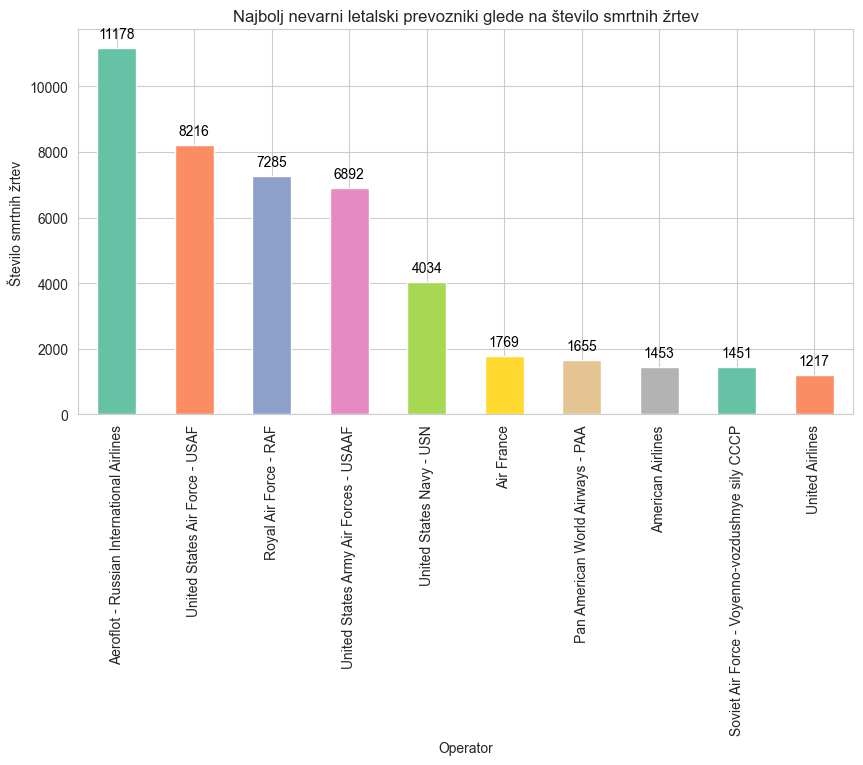

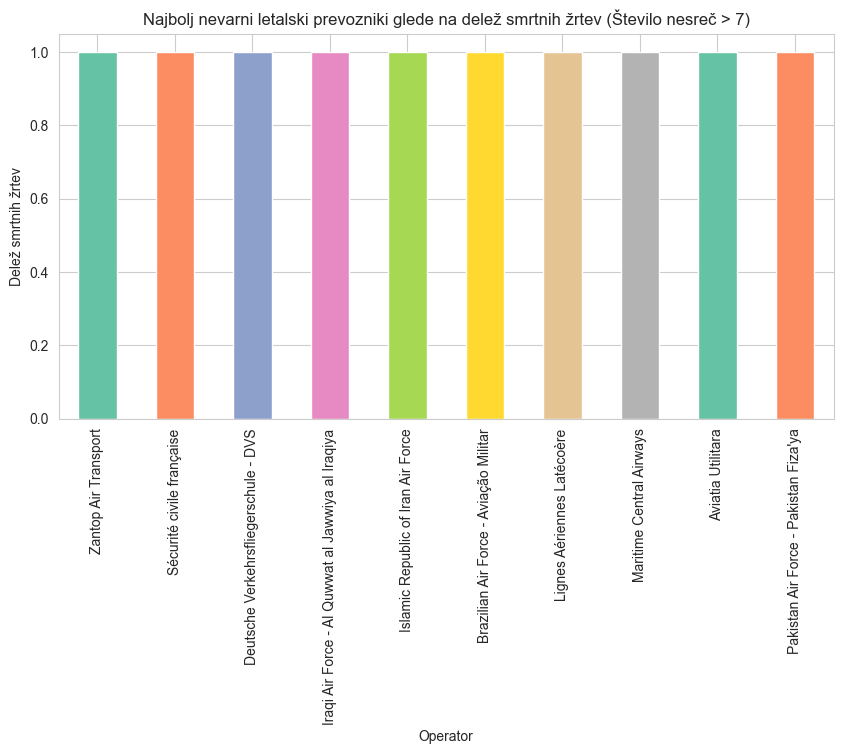

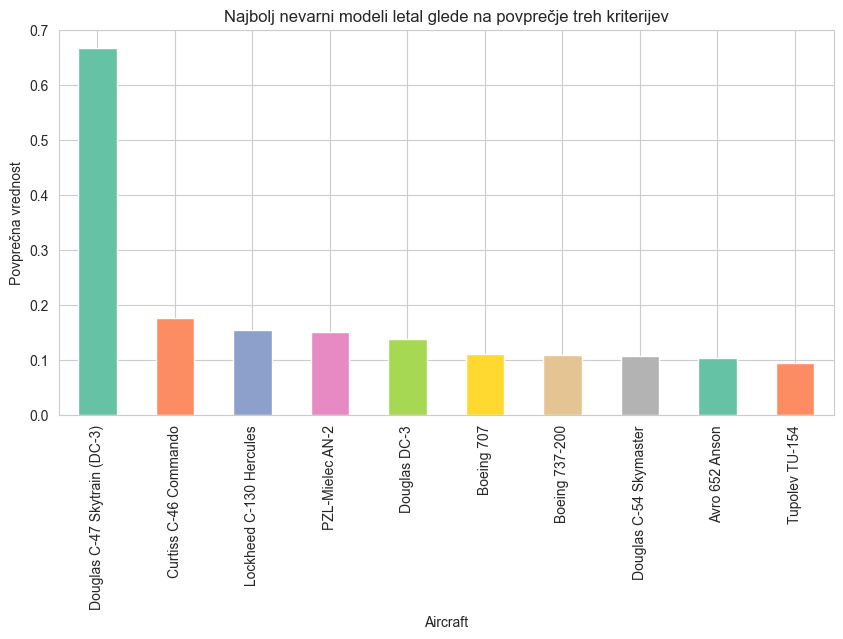

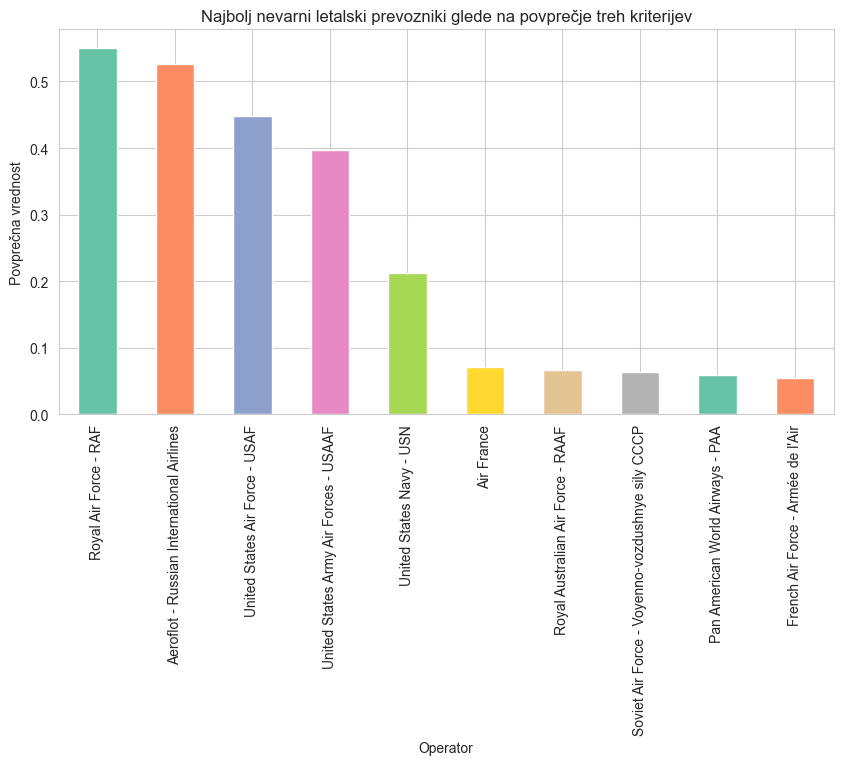

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Load the data
PlaneCrashes = pd.read_csv("C:/Users/Tomaz/Downloads/crashes/Plane Crashes.csv")

# Function to add annotations on bars
def add_annotations(ax, rotation=0):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}' if rotation == 45 else f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 10), textcoords='offset points', rotation=rotation)

# Which flight types are the most dangerous?
# Calculate the number of crashes for each flight type
crash_types = PlaneCrashes["Flight type"].value_counts()

# Calculate the total number of crashes
total_crashes = crash_types.sum()

# Calculate the proportion of crashes for each flight type
crash_types = crash_types / total_crashes

# Plot the proportion of crashes for each flight type
plt.figure(figsize=(10, 5))
ax = crash_types.plot(kind='bar', color=sns.color_palette("Set2"))
add_annotations(ax, rotation=45)
plt.title("Delež nesreč za vsak tip leta")
plt.ylabel("Delež nesreč")
plt.show()

# Most dangerous aircraft models by the number of crashes
plt.figure(figsize=(10, 5))
ax = PlaneCrashes["Aircraft"].value_counts().head(10).plot(kind='bar', color=sns.color_palette("Set2"))
add_annotations(ax)
plt.title("Najbolj nevarni modeli letal glede na število nesreč")
plt.ylabel("Število nesreč")
plt.show()

# Most dangerous aircraft models by the number of fatalities
plt.figure(figsize=(10, 5))
ax = PlaneCrashes.groupby("Aircraft")["Total fatalities"].sum().sort_values(ascending=False).head(10).plot(kind='bar', color=sns.color_palette("Set2"))
add_annotations(ax)
plt.title("Najbolj nevarni modeli letal glede na število smrtnih žrtev")
plt.ylabel("Število smrtnih žrtev")
plt.show()

# Most dangerous aircraft models by fatality rate
crash_counts = PlaneCrashes['Aircraft'].value_counts()
PlaneCrashes_filtered = PlaneCrashes[PlaneCrashes['Aircraft'].isin(crash_counts[crash_counts >= 55].index)]
total_passengers = PlaneCrashes_filtered.groupby('Aircraft')['Pax on board'].sum()
total_fatalities = PlaneCrashes_filtered.groupby('Aircraft')['PAX fatalities'].sum()
fatality_rate = total_fatalities / total_passengers
most_dangerous_aircrafts = fatality_rate.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
ax = most_dangerous_aircrafts.plot(kind='bar', color=sns.color_palette("Set2"))
plt.title("Najbolj nevarni modeli letal glede na delež smrtnih žrtev (Število nesreč > 55)")
plt.ylabel("Delež smrtnih žrtev")
plt.show()

# Most dangerous airlines by the number of crashes
plt.figure(figsize=(10, 5))
ax = PlaneCrashes["Operator"].value_counts().head(10).plot(kind='bar', color=sns.color_palette("Set2"))
add_annotations(ax)
plt.title("Najbolj nevarni letalski prevozniki glede na število nesreč")
plt.ylabel("Število nesreč")
plt.show()

# Most dangerous airlines by the number of fatalities
plt.figure(figsize=(10, 5))
ax = PlaneCrashes.groupby("Operator")["Total fatalities"].sum().sort_values(ascending=False).head(10).plot(kind='bar', color=sns.color_palette("Set2"))
add_annotations(ax)
plt.title("Najbolj nevarni letalski prevozniki glede na število smrtnih žrtev")
plt.ylabel("Število smrtnih žrtev")
plt.show()

# Most dangerous airlines by fatality rate
crash_counts = PlaneCrashes['Operator'].value_counts()
PlaneCrashes_filtered = PlaneCrashes[PlaneCrashes['Operator'].isin(crash_counts[crash_counts > 7].index)]
total_passengers = PlaneCrashes_filtered.groupby('Operator')['Pax on board'].sum()
total_fatalities = PlaneCrashes_filtered.groupby('Operator')['PAX fatalities'].sum()
fatality_rate = total_fatalities / total_passengers
most_dangerous_operators = fatality_rate.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
ax = most_dangerous_operators.plot(kind='bar', color=sns.color_palette("Set2"))
plt.title("Najbolj nevarni letalski prevozniki glede na delež smrtnih žrtev (Število nesreč > 7)")
plt.ylabel("Delež smrtnih žrtev")
plt.show()

# Most dangerous aircraft models based on three criteria
crash_counts = PlaneCrashes['Aircraft'].value_counts()
total_fatalities = PlaneCrashes.groupby('Aircraft')['Total fatalities'].sum()
total_passengers = PlaneCrashes.groupby('Aircraft')['Pax on board'].sum()
fatality_rate = total_fatalities / total_passengers

# Normalize the metrics
crash_counts = (crash_counts - crash_counts.min()) / (crash_counts.max() - crash_counts.min())
total_fatalities = (total_fatalities - total_fatalities.min()) / (total_fatalities.max() - total_fatalities.min())
fatality_rate = (fatality_rate - fatality_rate.min()) / (fatality_rate.max() - fatality_rate.min())

# Calculate the average score
average_score = (crash_counts + total_fatalities + fatality_rate) / 3

# Select the models with the highest average score
most_dangerous_aircrafts = average_score.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
ax = most_dangerous_aircrafts.plot(kind='bar', color=sns.color_palette("Set2"))
plt.title("Najbolj nevarni modeli letal glede na povprečje treh kriterijev")
plt.ylabel("Povprečna vrednost")
plt.show()

# Most dangerous airlines based on three criteria
crash_counts = PlaneCrashes['Operator'].value_counts()
total_fatalities = PlaneCrashes.groupby('Operator')['Total fatalities'].sum()
total_passengers = PlaneCrashes.groupby('Operator')['Pax on board'].sum()
fatality_rate = total_fatalities / total_passengers

# Normalize the metrics
crash_counts = (crash_counts - crash_counts.min()) / (crash_counts.max() - crash_counts.min())
total_fatalities = (total_fatalities - total_fatalities.min()) / (total_fatalities.max() - total_fatalities.min())
fatality_rate = (fatality_rate - fatality_rate.min()) / (fatality_rate.max() - fatality_rate.min())

# Calculate the average score
average_score = (crash_counts + total_fatalities + fatality_rate) / 3

# Select the operators with the highest average score
most_dangerous_operators = average_score.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
ax = most_dangerous_operators.plot(kind='bar', color=sns.color_palette("Set2"))
plt.title("Najbolj nevarni letalski prevozniki glede na povprečje treh kriterijev")
plt.ylabel("Povprečna vrednost")
plt.show()


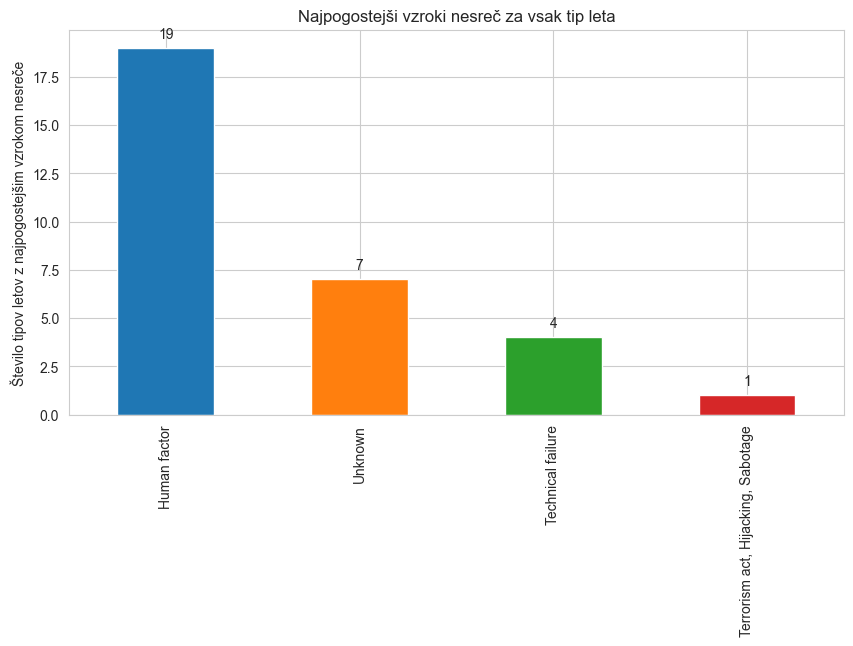

<Figure size 1000x2200 with 0 Axes>

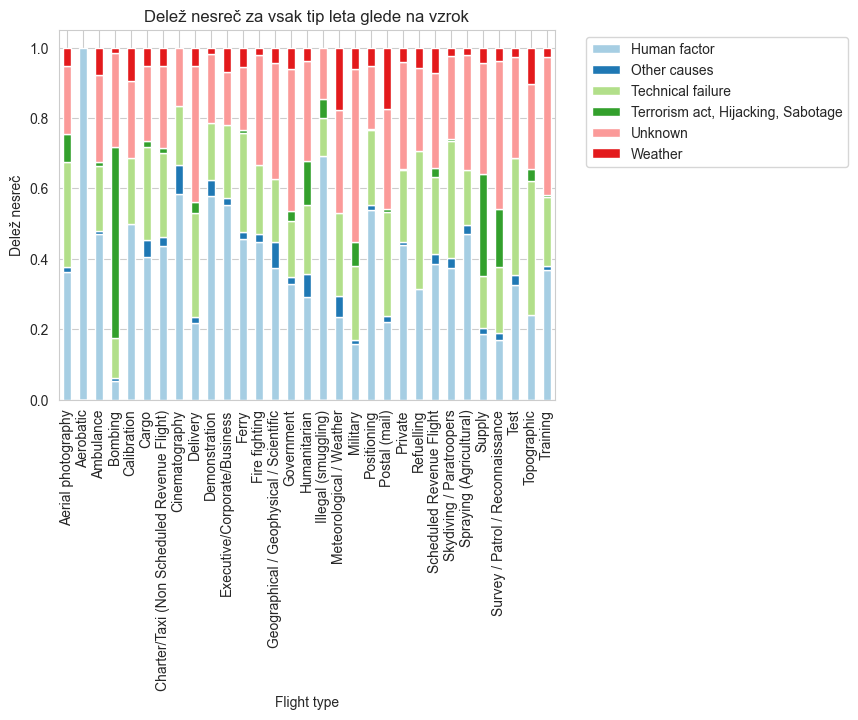

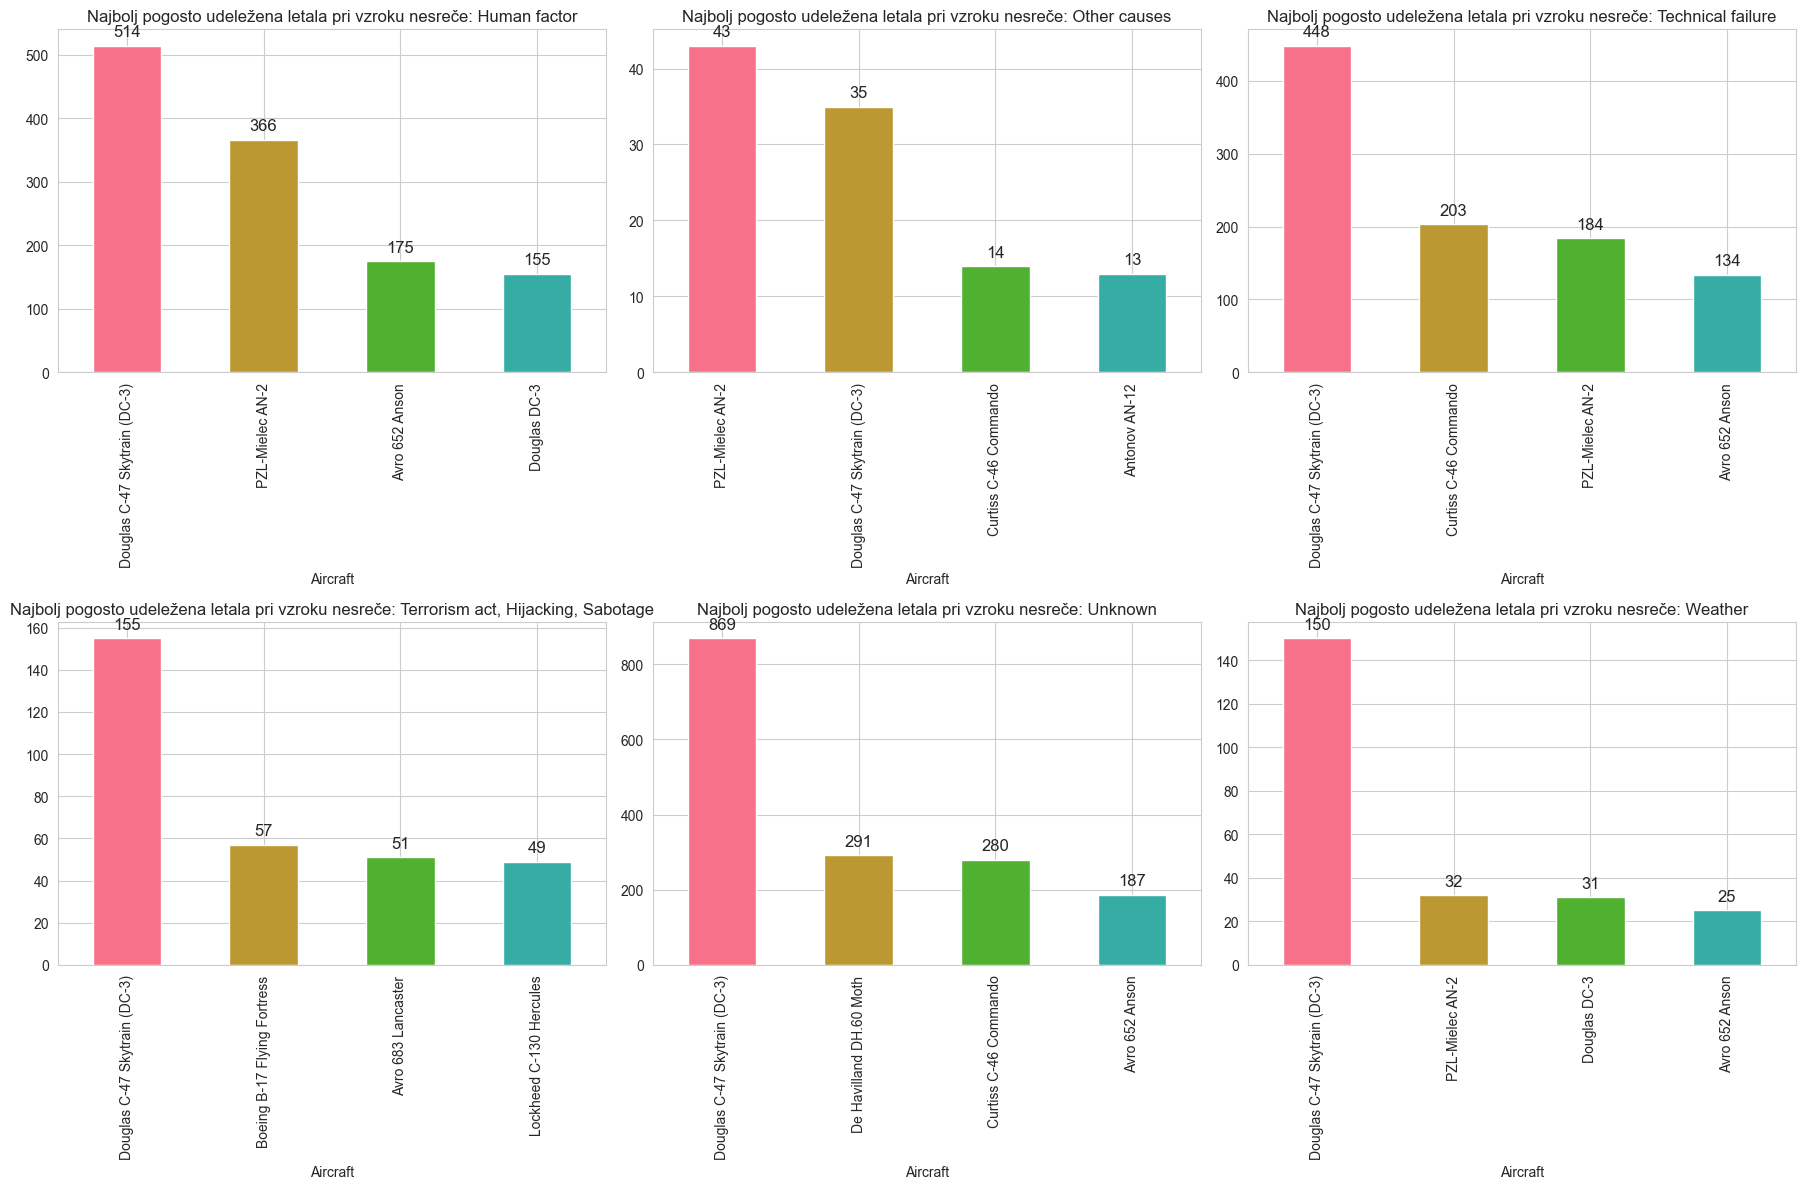

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a style for the plots
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Filter rows with a specified crash cause
PlaneCrashes_filtered = PlaneCrashes[PlaneCrashes["Crash cause"].notnull()]

# Calculate the number of crashes for each flight type and crash cause
crash_causes = PlaneCrashes_filtered.groupby(["Flight type", "Crash cause"]).size()

# Find the most common cause of crashes for each flight type
most_common_causes = crash_causes.groupby(level=0).idxmax().apply(lambda x: x[1])

# Plot the most common causes of crashes for each flight type
plt.figure(figsize=(10, 5))
sns.set_palette("tab10")
ax = most_common_causes.value_counts().plot(kind='bar', color=sns.color_palette("tab10"))
plt.title("Najpogostejši vzroki nesreč za vsak tip leta")
plt.ylabel("Število tipov letov z najpogostejšim vzrokom nesreče")

# Annotate bars with values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Plot the share of crashes for each flight type by cause
plt.figure(figsize=(10, 22))
crash_causes = crash_causes.unstack().fillna(0)
crash_causes = crash_causes.div(crash_causes.sum(axis=1), axis=0)
sns.set_palette("Paired")
ax = crash_causes.plot(kind='bar', stacked=True, color=sns.color_palette("Paired"))
plt.title("Delež nesreč za vsak tip leta glede na vzrok")
plt.ylabel("Delež nesreč")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Predpostavimo, da je PlaneCrashes_filtered že naložen in filtriran
PlaneCrashes_filtered = PlaneCrashes_filtered[PlaneCrashes_filtered["Aircraft"].notnull()]

# Izračunaj število primerov za vsak vzrok nesreče in model letala
crash_causes = PlaneCrashes_filtered.groupby(["Crash cause", "Aircraft"]).size()

# Izberi 4 najpogostejša letala za vsak vzrok nesreče
most_common_aircraft = crash_causes.groupby(level=0).nlargest(4)

# Dobi seznam unikatnih vzrokov nesreč
crash_causes_list = most_common_aircraft.index.get_level_values(0).unique()

# Ustvari subplots
num_plots = len(crash_causes_list)
cols = 3
rows = (num_plots + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(18, rows * 6))
axs = axs.flatten()

for i, cause in enumerate(crash_causes_list):
    data = most_common_aircraft[cause]
    data = data.droplevel(0)  # Odstrani prvo raven indeksa (vzrok nesreče)
    
    sns.set_palette("husl")
    ax = data.plot(kind='bar', color=sns.color_palette("husl"), ax=axs[i])
    ax.set_title(f"Najbolj pogosto udeležena letala pri vzroku nesreče: {cause}")  # Naslov grafa
    
    # Dodaj vrednosti nad stolpci
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)  # Velikost pisave

# Počisti morebitne neuporabljene subplote
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# Zaključek: Najpogostejši vzrok nesreč je "Človeški dejavnik" ali napaka pilota.

